In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

This code is based on the "Data" sheet from the Bank_Loan_modelling dataset in Kaggle

In [2]:
loan_data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')

First, we have to understand the data we are working with (including understanding all the variables the dataset contains).

In [3]:
# Nº of rows and columns
loan_data.shape

(5000, 14)

In [4]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Concise summary of the 'df', containing also the type of the variables
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Basic statistics for variables (not all of them are relevant, for example ID, but for understanding the 'df' is fine)
loan_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Nº of NaN (missing values) in each column
loan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No missing values in any of the variables

In [8]:
# Eliminate the columns 'ID' y 'ZIP Code' as they are not relevant for the analysis
loan_data = loan_data.drop(columns=['ID', 'ZIP Code'])

In [9]:
x = loan_data.drop('Personal Loan', axis=1)
y = loan_data['Personal Loan']

This code prepares the data for a classification problem where the goal is to predict whether a customer will take out a personal loan (Personal Loan). In this case:

x: Predictor variables (e.g., income, age, education, etc.).
y: Target variable, such as 0 (did not take the loan) or 1 (took the loan).

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

We are solving this classification problem with a Decision Tree and a Random Forest model. The hyperparameters from both models are selected according to the book "Approaching (Almost) Any Machine Learning Problem" (table in page 184).

## Decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier with manually selected hyperparameters
dt_classifier = DecisionTreeClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=1, random_state=42)

# Train the model
dt_classifier.fit(x_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(x_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)


Accuracy: 0.987


max_depth: This hyperparameter controls the maximum depth of the decision tree. A deeper tree can lead to a more complex model that fits the training data better, but it can also increase the risk of overfitting. A value of 15 was chosen to limit the depth of the tree and avoid overfitting, as this value is expected to allow the tree to capture complex patterns in the data without becoming too complex.

min_samples_split: This hyperparameter sets the minimum number of samples required to split an internal node. A higher value for min_samples_split can help avoid splits that create branches with few data points, reducing the risk of overfitting. A value of 5 was chosen to ensure that there are enough samples in each split to make meaningful predictions, but not so high as to overly restrict the growth of the tree.

min_samples_leaf: This hyperparameter sets the minimum number of samples required to form a leaf in the tree. A higher value for min_samples_leaf can help prevent overfitting by limiting the minimum number of samples in a leaf, avoiding overly specific splits. A value of 1 was chosen to allow the tree to capture even the most specific relationships between the features and labels.

random_state: Ensures the reproducibility of results by setting the seed for random number generation. This allows the same random data and splits to be used in each run, ensuring consistent results.

## Random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier with the selected hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=120, 
    max_depth=25, 
    min_samples_split=5, 
    min_samples_leaf=1, 
    max_features='sqrt', 
    random_state=42
)

# Train the model
rf_classifier.fit(x_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

Accuracy: 0.99


n_estimators: This hyperparameter indicates the number of trees to be built. A higher number of trees generally improves the model's accuracy, but it also increases the computational cost. Higher values are chosen to capture a wider range of relationships in the data and reduce the variability inherent in building individual trees. In this case, a higher value such as 100 or 200 could be chosen, but to keep the training time reasonable, an intermediate value like 120 could be selected.

max_depth: This hyperparameter controls the maximum depth of each tree. Limiting the depth of the trees can help prevent overfitting and improve the model’s generalization ability. A moderately high value, such as 25, is chosen to allow the trees to capture complex relationships in the data without becoming overly complex.

min_samples_split: This hyperparameter sets the minimum number of samples required to split an internal node. A higher value can help prevent splits that generate branches with few data points, thus reducing overfitting. An intermediate value like 5 is chosen to ensure that there are enough samples in each split to make meaningful predictions.

min_samples_leaf: This hyperparameter sets the minimum number of samples required to form a leaf in the tree. Like min_samples_split, a higher value can help prevent overfitting by limiting the minimum number of samples in a leaf. A low value like 1 is chosen to allow the tree to capture even specific relationships between features and labels.

max_features: This hyperparameter controls the number of features to consider when searching for the best split at each node. It can be specified as a numeric value, percentage, or string ('sqrt', 'log2', None). 'sqrt' selects the number of features equal to the square root of the total number of features. 'sqrt' is chosen to keep the model more generalized.

## Display the results

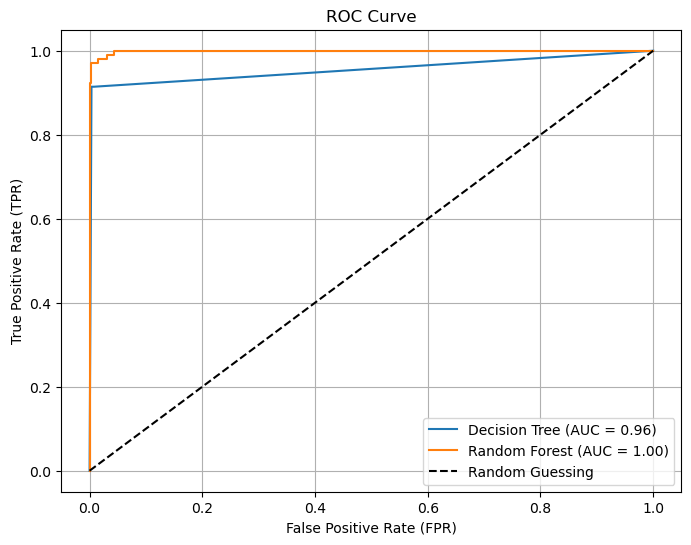

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, roc_auc_score, classification_report, PrecisionRecallDisplay
)

# Calculate model probabilities for ROC curve
y_proba_dt = dt_classifier.predict_proba(x_test)[:, 1]
y_proba_rf = rf_classifier.predict_proba(x_test)[:, 1]

# Calculate ROC curve values
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Calculate AUC (Area Under the Curve)
auc_dt = roc_auc_score(y_test, y_proba_dt)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", linestyle="-")  # Continuous line
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle="-")  # Continuous line
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Classification report (Precision, Recall, F1-score)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))

print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_classifier.predict(x_test)))

The Decision Tree and Random Forest classifiers demonstrate good predictive performance based on metrics like AUC and classification reports.
The Random Forest model likely outperforms the Decision Tree due to its ensemble nature, which reduces overfitting and improves generalization > Random Forest is essentially an enhanced version of a Decision Tree, designed to address its limitations. While a Decision Tree consists of a single structure built using the entire dataset, Random Forest combines multiple trees, each trained on a random subset of the data and features. This ensemble approach reduces overfitting, a common issue with Decision Trees, and improves generalization by averaging the predictions of all trees (via majority voting for classification or averaging for regression). Additionally, Random Forest introduces randomness in feature selection at each node, encouraging diversity among the trees. Although it is less interpretable than a single Decision Tree, it is generally more accurate and robust, making it a powerful tool for predictive tasks.

## Example if a loan is approved or rejected

In [14]:
import numpy as np

# Request input variables
print("Enter the client's details to evaluate if the loan will be granted:")

age = int(input("Age (in years): "))
experience = int(input("Years of professional experience: "))
income = float(input("Annual income (in USD): "))
family = int(input("Number of family members: "))
cc_avg = float(input("Average monthly credit card spending (in USD): "))
education = int(input("Education level (1: Undergraduate, 2: Graduate, 3: Advanced/Professional): "))
mortgage = float(input("Mortgage amount (in USD): "))
securities_account = int(input("Does the client have a securities account? (0: No, 1: Yes): "))
cd_account = int(input("Does the client have a certificate of deposit (CD) account? (0: No, 1: Yes): "))
online = int(input("Does the client use online banking? (0: No, 1: Yes): "))
credit_card = int(input("Does the client have a credit card issued by the bank? (0: No, 1: Yes): "))

# Create an array with the input data
new_client = np.array([[age, experience, income, family, cc_avg, education, mortgage, securities_account, cd_account, online, credit_card]])

# Verify dimensions

print("\nClient data entered:")
print(new_client)

# Prediction using Decision Tree
dt_prediction = dt_classifier.predict(new_client)
print("\nDecision Tree Prediction:", "Loan Approved" if dt_prediction[0] == 1 else "Loan Not Approved")

# Prediction using Random Forest
rf_prediction = rf_classifier.predict(new_client)
print("Random Forest Prediction:", "Loan Approved" if rf_prediction[0] == 1 else "Loan Not Approved")


Enter the client's details to evaluate if the loan will be granted:
Age (in years): 18
Years of professional experience: 0
Annual income (in USD): 0
Number of family members: 1
Average monthly credit card spending (in USD): 50
Education level (1: Undergraduate, 2: Graduate, 3: Advanced/Professional): 1
Mortgage amount (in USD): 1000000
Does the client have a securities account? (0: No, 1: Yes): 0
Does the client have a certificate of deposit (CD) account? (0: No, 1: Yes): 0
Does the client use online banking? (0: No, 1: Yes): 1
Does the client have a credit card issued by the bank? (0: No, 1: Yes): 1

Client data entered:
[[1.8e+01 0.0e+00 0.0e+00 1.0e+00 5.0e+01 1.0e+00 1.0e+06 0.0e+00 0.0e+00
  1.0e+00 1.0e+00]]

Decision Tree Prediction: Loan Approved
Random Forest Prediction: Loan Not Approved


C:\Users\pabli\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\pabli\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
